In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [3]:
df = pd.read_csv("creditcard.csv")


In [4]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [5]:
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
print("\n=== Logistic Regression ===")
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("Classification Report:\n", classification_report(y_test, lr_pred, zero_division=0))



=== Logistic Regression ===
Accuracy: 0.9991573329588147
Confusion Matrix:
 [[56848    16]
 [   32    66]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.67      0.73        98

    accuracy                           1.00     56962
   macro avg       0.90      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962



c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
print("\n=== Decision Tree ===")
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred, zero_division=0))



=== Decision Tree ===
Accuracy: 0.9990871107053826
Confusion Matrix:
 [[56839    25]
 [   27    71]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.72      0.73        98

    accuracy                           1.00     56962
   macro avg       0.87      0.86      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [9]:
print("\n=== Random Forest ===")
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred, zero_division=0))



=== Random Forest ===
Accuracy: 0.9995962220427653
Confusion Matrix:
 [[56859     5]
 [   18    80]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [10]:
print("\n=== Gradient Boosting ===")
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, gb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("Classification Report:\n", classification_report(y_test, gb_pred, zero_division=0))



=== Gradient Boosting ===
Accuracy: 0.9983146659176293
Confusion Matrix:
 [[56848    16]
 [   80    18]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.18      0.27        98

    accuracy                           1.00     56962
   macro avg       0.76      0.59      0.64     56962
weighted avg       1.00      1.00      1.00     56962



In [11]:
model_accuracies = {}


In [12]:
model_accuracies['Logitic Regression']=accuracy_score(y_test, lr_pred)
model_accuracies['Decision Tree'] = accuracy_score(y_test, dt_pred)
model_accuracies['Random Forest'] = accuracy_score(y_test, rf_pred)
model_accuracies['Gradient Boosting'] = accuracy_score(y_test, gb_pred)


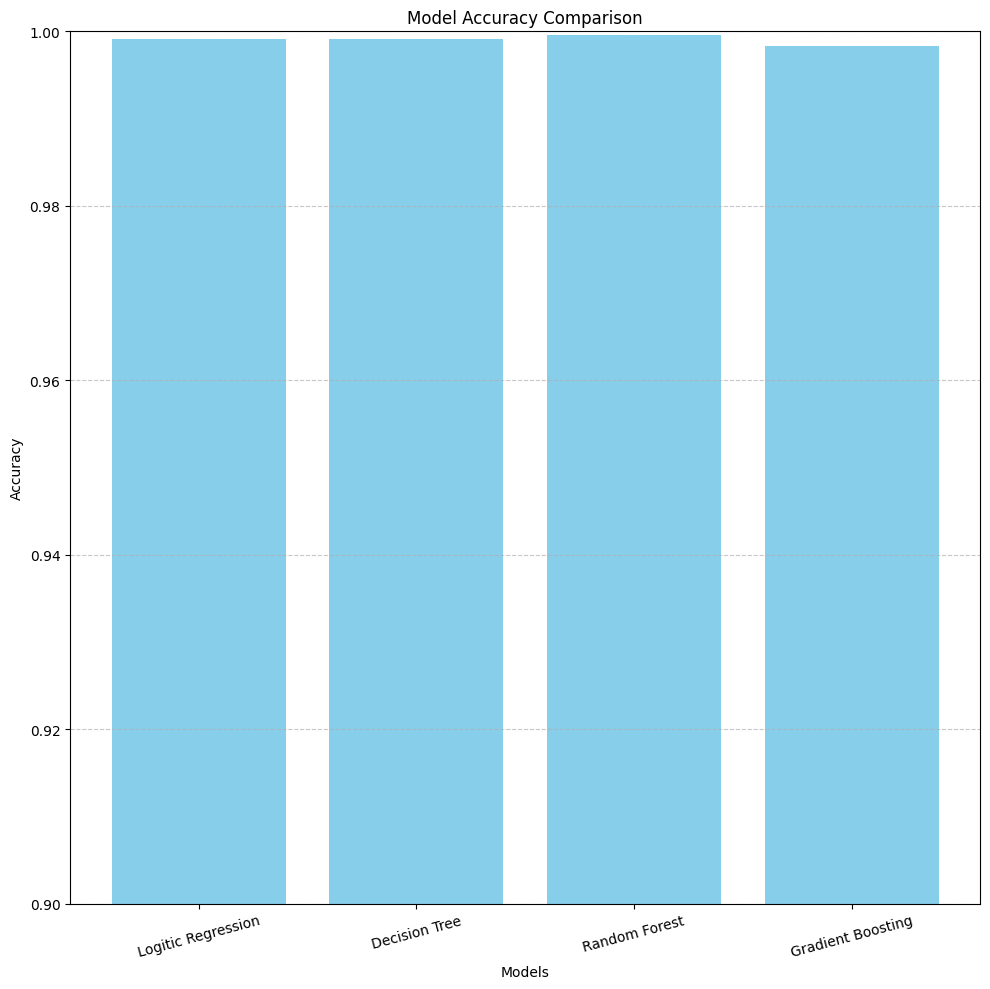

In [13]:
# Plotting accuracy comparison
plt.figure(figsize=(10, 10))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.9, 1.0)  # Adjust range if needed
plt.xticks(rotation=15)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
